In [1]:
#For Colab For Extracting Data
import zipfile
import os

# Specify the path to the ZIP file and the extraction directory
zip_file_path = '/content/data_resized.zip'
extract_to_dir = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f"ZIP file extracted to {extract_to_dir}")


ZIP file extracted to /content/


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from PIL import Image
from keras.utils import plot_model
from zipfile import ZipFile, BadZipFile
import random as r
import warnings
import matplotlib.patches as patches
warnings.filterwarnings('ignore')

In [3]:
train_path = '/content/Train'
test_path = '/content/Test'
validation_path = '/content/Validation'

In [4]:
os.listdir(validation_path)

['Healthy', 'EarlyBlight', 'Rust', 'LateBlight', 'Powdery']

In [5]:
def count_files_in_folder(path):
  folder_data = []
  for fol in os.listdir(path):
    folder_path = os.path.join(path, fol)
    fil = os.listdir(folder_path)
    num_files = 0
    for item in fil:
      if os.path.isfile(os.path.join(folder_path, item)):
        num_files +=1

    folder_data.append([fol, num_files])


  return folder_data

In [6]:
train_data = count_files_in_folder(train_path)
test_data = count_files_in_folder(test_path)
validation_data = count_files_in_folder(validation_path)

In [7]:
train_df = pd.DataFrame(train_data, columns =['Folder', 'Total Files'])
test_df = pd.DataFrame(test_data, columns =['Folder', 'Total Files'])
validation_df = pd.DataFrame(validation_data, columns =['Folder', 'Total Files'])

In [8]:
train_df['Type'] = 'Train'
test_df['Type'] = 'Test'
validation_df['Type'] = 'Validation'

In [9]:
combined_df = pd.concat([train_df, test_df, validation_df])

In [10]:
combined_df

Folder  Total Files        Type
0      Healthy          458       Train
1  EarlyBlight          445       Train
2         Rust          434       Train
3   LateBlight          445       Train
4      Powdery          430       Train
0      Healthy           50        Test
1  EarlyBlight           50        Test
2         Rust           50        Test
3   LateBlight           50        Test
4      Powdery           50        Test
0      Healthy           20  Validation
1  EarlyBlight           20  Validation
2         Rust           20  Validation
3   LateBlight           20  Validation
4      Powdery           20  Validation

<Axes: xlabel='Folder', ylabel='Total Files'>

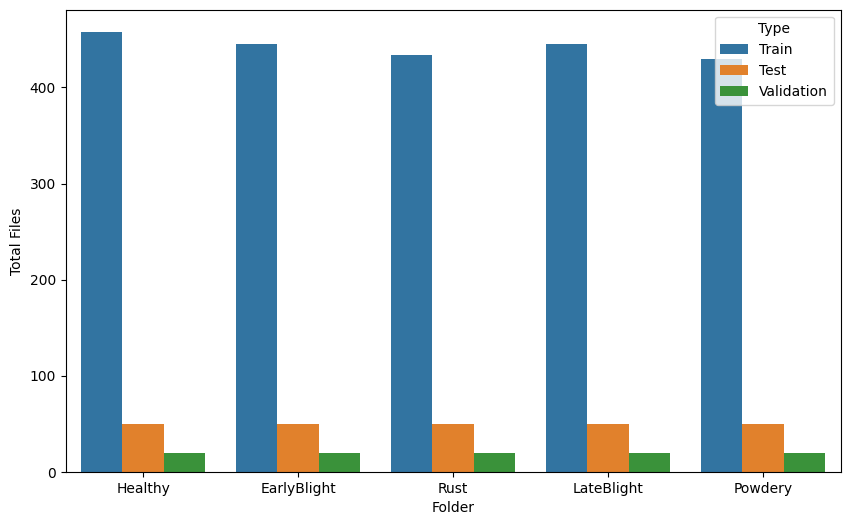

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Folder', y ='Total Files', hue ='Type', data =combined_df)

In [12]:
def plot_sample_img(path_folder, sample_size = 5):
  images =[]
  all_file = [f for f in os.listdir(path_folder) if os.path.isfile(os.path.join(path_folder, f))]
  sample_file = r.sample(all_file, sample_size)

  for img in sample_file:
    path = os.path.join(path_folder, img)
    image = Image.open(path)
    images.append(image)

  return images

In [13]:
train_earlyBlight = '/content/Train/EarlyBlight'
train_healthy = '/content/Train/Healthy'
train_lateBlight = '/content/Train/LateBlight'
train_Powdery = '/content/Train/Powdery'
train_Rust = '/content/Train/Rust'

In [14]:
earlyBlight_img = plot_sample_img(train_earlyBlight)
healthy_img = plot_sample_img(train_healthy)
lateBlight_img = plot_sample_img(train_lateBlight)
powdery_img = plot_sample_img(train_Powdery)
rust_img = plot_sample_img(train_Rust)

In [16]:
all_img = [earlyBlight_img, healthy_img, lateBlight_img, powdery_img, rust_img]

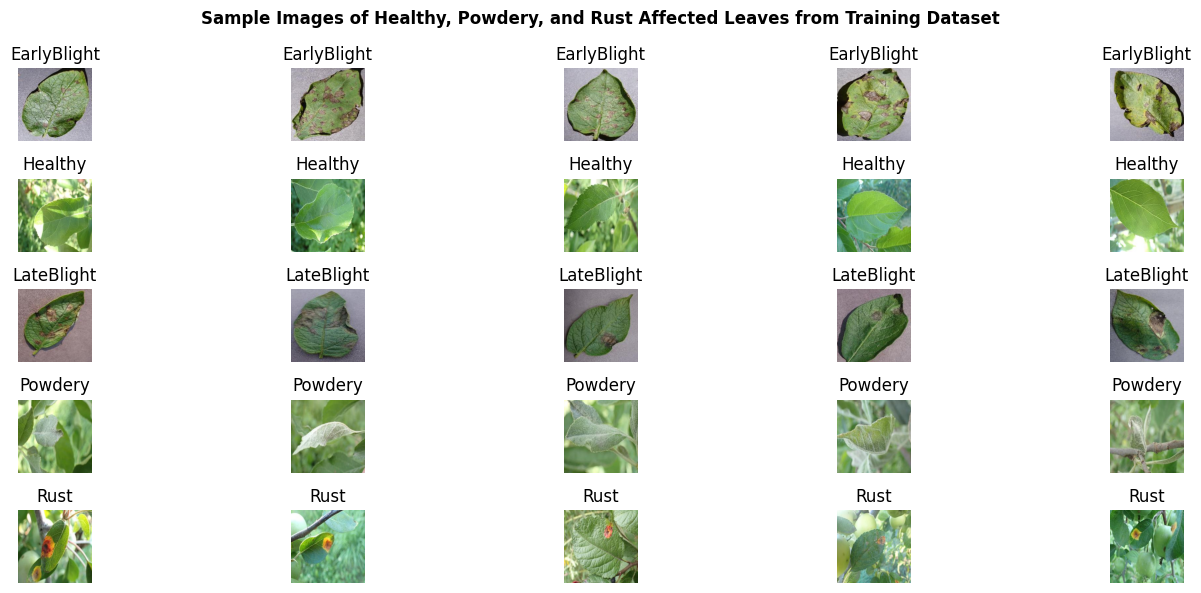

In [18]:
fig, axes = plt.subplots(5, len(healthy_img), figsize=(15,6))
title = ['EarlyBlight','Healthy', 'LateBlight','Powdery', 'Rust']
for row, category in enumerate(all_img):
  for i, img in enumerate(category):
    axes[row, i].imshow(img)
    axes[row, i].set_title(title[row])
    axes[row, i].axis('off')

plt.suptitle('Sample Images of Healthy, Powdery, and Rust Affected Leaves from Training Dataset', fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale = 1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_path,
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode = 'categorical')

Found 2212 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [21]:
train_generator.class_indices

{'EarlyBlight': 0, 'Healthy': 1, 'LateBlight': 2, 'Powdery': 3, 'Rust': 4}

In [24]:
model = Sequential()

model.add(Conv2D(56, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(28, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
16
model.add(Dense(32, activation = 'relu'))
model.add(Dense(14, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 394ms/step - accuracy: 0.2770 - loss: 1.5376 - val_accuracy: 0.4900 - val_loss: 0.9624
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - accuracy: 0.4996 - loss: 1.0322 - val_accuracy: 0.6100 - val_loss: 0.7542
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 0.6618 - loss: 0.7780 - val_accuracy: 0.7200 - val_loss: 0.6843
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - accuracy: 0.7456 - loss: 0.6480 - val_accuracy: 0.7800 - val_loss: 0.5199
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 313ms/step - accuracy: 0.7376 - loss: 0.6310 - val_accuracy: 0.8000 - val_loss: 0.4061
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - accuracy: 0.7846 - loss: 0.5181 - val_accuracy: 0.8700 - val_loss: 0.2793
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 348ms/step - accuracy: 0.8180 - loss: 0.4713 - val_accuracy: 0.9000 - val_loss: 0.2654
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 333ms/step - accuracy: 0.8535 - loss: 0.3946 - val_accu

In [34]:
#save the model
model.save('disease_image.keras')

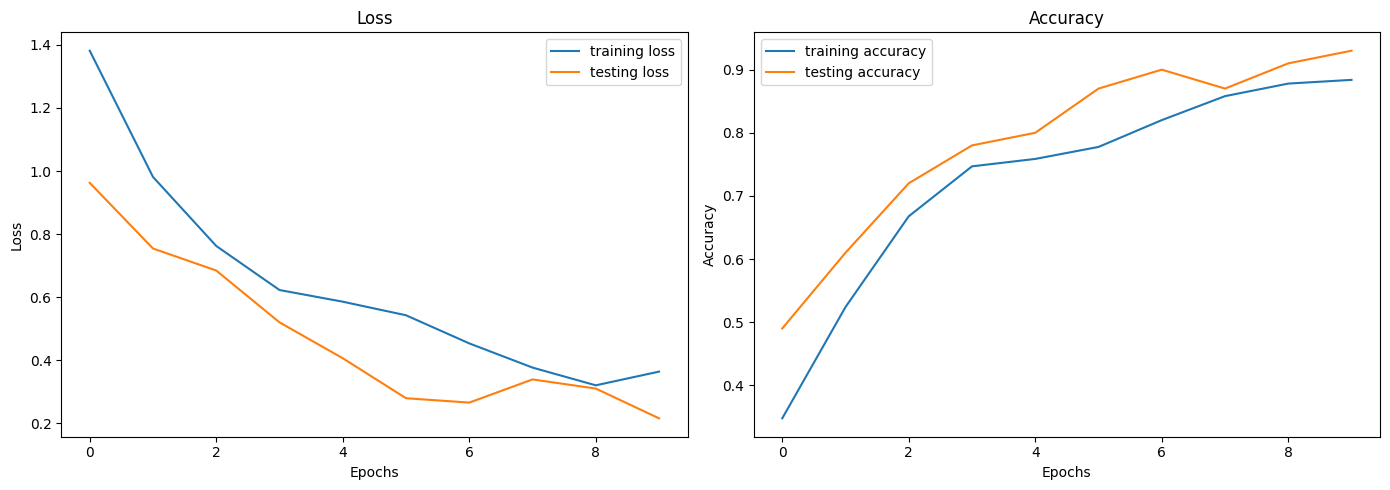

In [27]:
fig, axes = plt.subplots(1,2 , figsize =(14, 5))

sns.lineplot(ax = axes[0], data = history.history['loss'], label = 'training loss' )
sns.lineplot(ax= axes[0], data = history.history['val_loss'], label = 'testing loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

sns.lineplot(ax = axes[1], data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(ax = axes[1], data = history.history['val_accuracy'], label = 'testing accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

In [28]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.9022 - loss: 0.3640
Testing Loss: 0.37216854095458984
Testing Accuracy: 0.8920000195503235


In [29]:
def process_image(img, target_size=(224, 224)):
    # If img is a path, load the image
    if isinstance(img, str):
        img = image.load_img(img, target_size=target_size)
    else:
        # If img is a PIL image, resize it
        img = img.resize(target_size)

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

In [30]:
test_earlyBlight = '/content/Test/EarlyBlight'
test_healthy = '/content/Test/Healthy'
test_lateBlight = '/content/Test/LateBlight'
test_Powdery = '/content/Test/Powdery'
test_Rust = '/content/Test/Rust'

In [31]:
img_earlyBlight = plot_sample_img(test_earlyBlight)
img_lateBlight = plot_sample_img(test_lateBlight)
img_healthy = plot_sample_img(test_healthy)
img_Powdery = plot_sample_img(test_Powdery)
img_Rust = plot_sample_img(test_Rust)

In [32]:
train_generator.class_indices

{'EarlyBlight': 0, 'Healthy': 1, 'LateBlight': 2, 'Powdery': 3, 'Rust': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


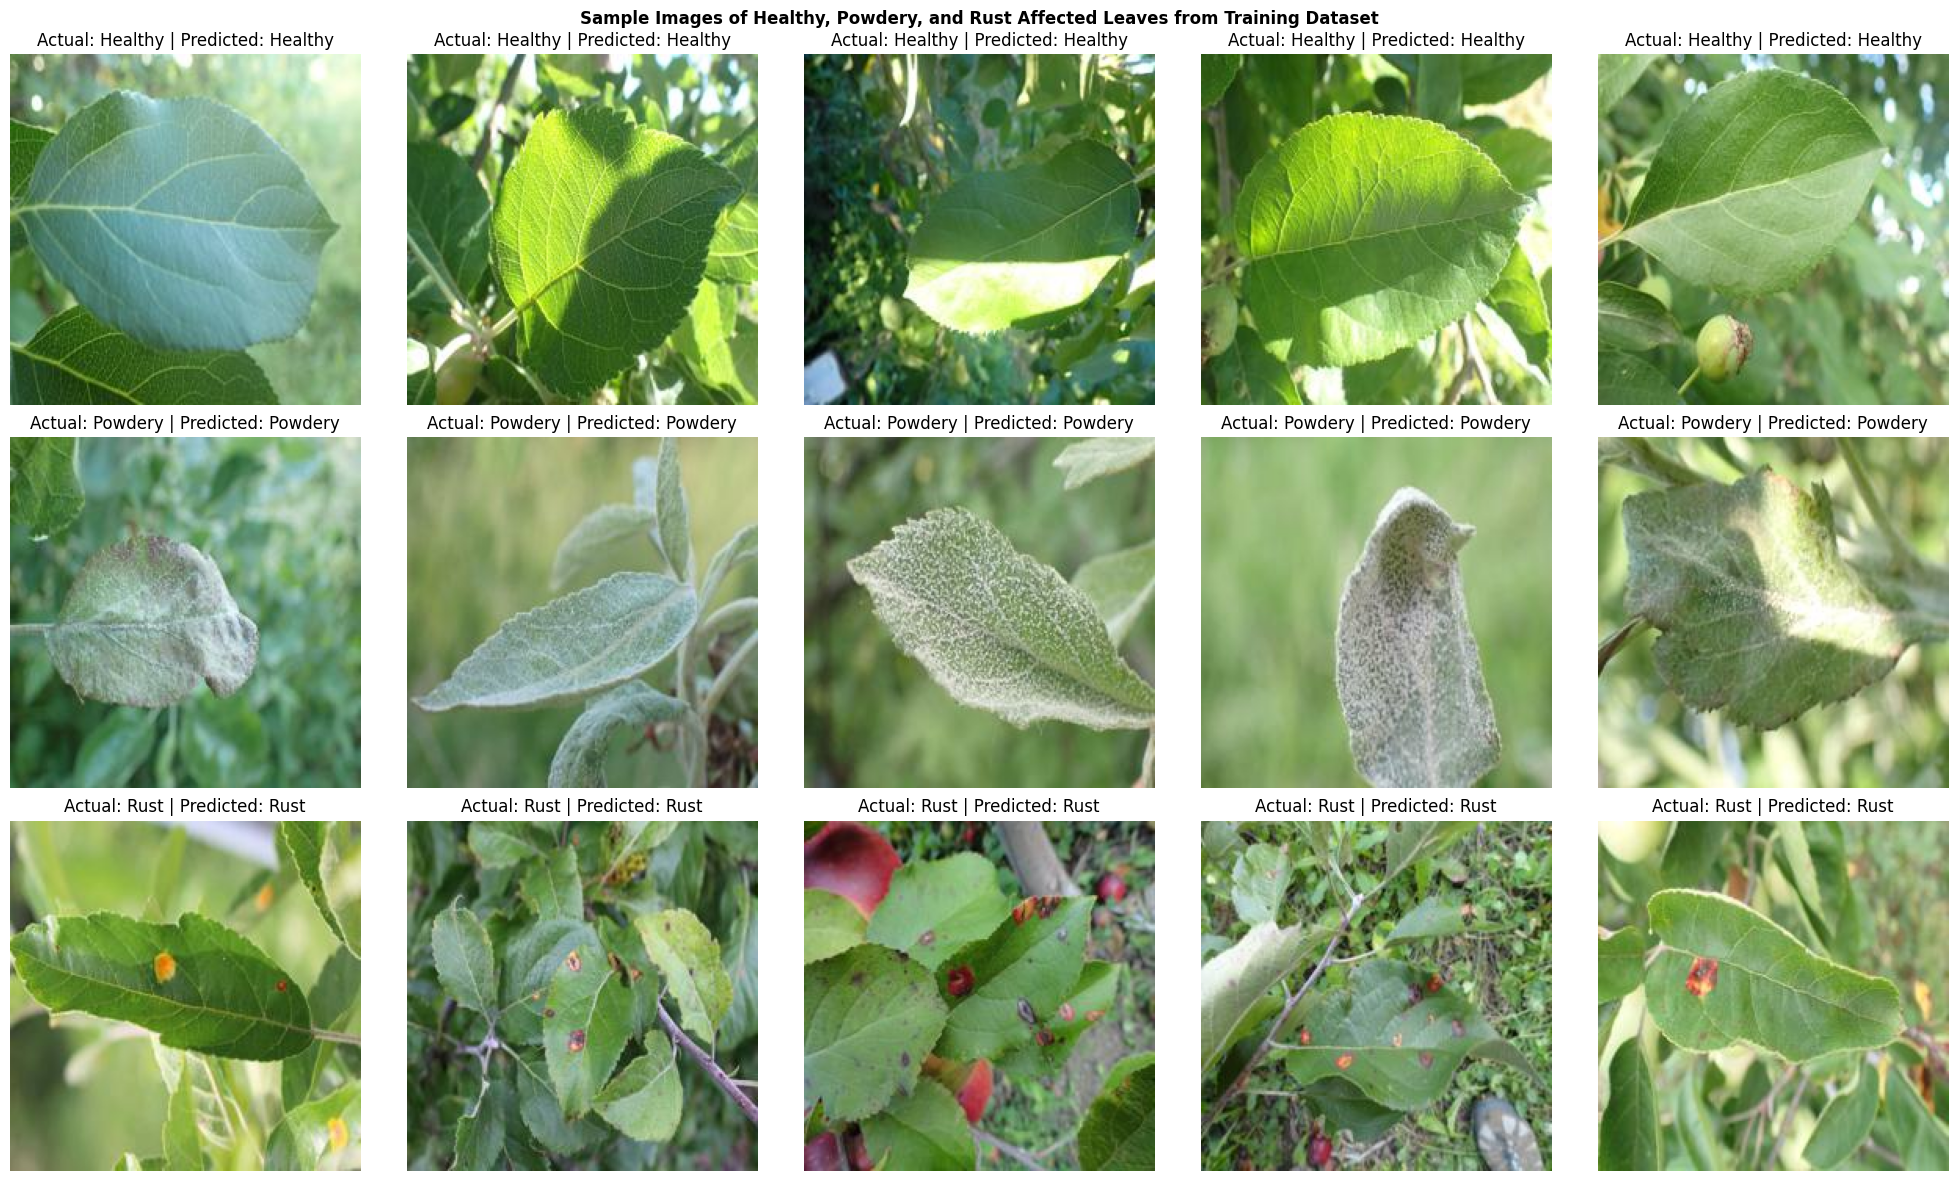

In [33]:
test_img = [img_healthy, img_Powdery, img_Rust]
fig, axes = plt.subplots(3, len(healthy_img), figsize=(20,12))
title = ['Actual: Healthy', 'Actual: Powdery', 'Actual: Rust']
for row, category in enumerate(test_img):
  for i, img in enumerate(category):
    processed_img = process_image(img)
    pred = model.predict(processed_img)
    ind = np.argmax(pred)

    if ind == 0:
        pred_title = ' | Predicted: EarlyBlight'
    elif ind == 1:
        pred_title = ' | Predicted: Healthy'
    elif ind == 2:
        pred_title = ' | Predicted: LateBlight'
    elif ind == 3:
        pred_title = ' | Predicted: Powdery'
    else:
        pred_title = ' | Predicted: Rust'
    axes[row, i].imshow(img)
    axes[row, i].set_title(title[row] + pred_title)
    axes[row, i].axis('off')

plt.suptitle('Sample Images of Healthy, Powdery, and Rust Affected Leaves from Training Dataset', fontweight='bold')
plt.tight_layout()
plt.show()

In [36]:
import tensorflow as tf

# Load the trained Keras model
model = tf.keras.models.load_model('disease_image.keras')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model to a file
tflite_model_path = 'disease_image.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {tflite_model_path}")


Saved artifact at '/tmp/tmpiz3qd79h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138308953454400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307831876944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307831886272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307831887680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307831880112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307832111776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307832108080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307832118992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307832118288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138307832333408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1383078323408